In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("gs://sanofi-ml-workshop-lending-club/data/DR_Demo_Lending_Club.csv")

In [3]:
data.shape

(10000, 28)

In [4]:
data.is_bad.value_counts()

0    8705
1    1295
Name: is_bad, dtype: int64

In [5]:
event_rate = (1295/10000)*100

In [6]:
data.describe()

,Id,is_bad,annual_inc,debt_to_income,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog
count,10000.00000,10000.000000,9999.000000,10000.000000,9995.000000,9995.000000,3684.000000,840.000000,9995.000000,9995.000000,1.000000e+04,9974.000000,9995.000000,9968.0,10000.000000
mean,5000.50000,0.129500,68203.011539,13.338704,0.148174,1.066933,35.890337,61.652381,9.334567,0.060130,1.427101e+04,48.450771,22.011306,0.0,2.002200
std,2886.89568,0.335769,48590.252757,6.754212,0.506270,1.476052,22.361443,46.189619,4.526590,0.251245,2.543791e+04,28.220557,11.709400,0.0,0.810963
min,1.00000,0.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,1.000000,0.0,1.000000
25%,2500.75000,0.000000,40000.000000,8.160000,0.000000,0.000000,18.000000,0.000000,6.000000,0.000000,3.524500e+03,25.000000,13.000000,0.0,1.000000
50%,5000.50000,0.000000,58000.000000,13.410000,0.000000,1.000000,34.000000,86.000000,9.000000,0.000000,8.645500e+03,48.700000,20.000000,0.0,2.000000
75%,7500.25000,0.000000,82000.000000,18.692500,0.000000,2.000000,53.000000,101.000000,12.000000,0.000000,1.695225e+04,71.800000,29.000000,0.0,3.000000
max,10000.00000,1.000000,900000.000000,29.990000,11.000000,25.000000,120.000000,119.000000,39.000000,3.000000,1.207359e+06,100.600000,90.000000,0.0,3.000000


In [7]:
# Percentage of null values
100*data.isnull().sum()[data.isnull().sum()>0]/data.shape[0]

emp_title                      5.92
annual_inc                     0.01
Notes                         31.67
purpose                        0.04
delinq_2yrs                    0.05
earliest_cr_line               0.05
inq_last_6mths                 0.05
mths_since_last_delinq        63.16
mths_since_last_record        91.60
open_acc                       0.05
pub_rec                        0.05
revol_util                     0.26
total_acc                      0.05
collections_12_mths_ex_med     0.32
dtype: float64

In [8]:
#data[['Id','mths_since_last_record','mths_since_last_delinq']]

In [9]:
data.drop(labels = ['mths_since_last_delinq','mths_since_last_record','collections_12_mths_ex_med','Notes','emp_title','earliest_cr_line','purpose','emp_length'], axis =1 , inplace = True)

In [10]:
data.drop(labels  = ['Id'], axis =1, inplace = True)

In [11]:
num_cols = data.describe().columns.tolist() 

In [12]:
cat_cols = list(set(data.columns.tolist()) - set(num_cols))

In [13]:
target_variable  = 'is_bad'

In [14]:
data[num_cols].isnull().sum()

is_bad                          0
annual_inc                      1
debt_to_income                  0
delinq_2yrs                     5
inq_last_6mths                  5
open_acc                        5
pub_rec                         5
revol_bal                       0
revol_util                     26
total_acc                       5
mths_since_last_major_derog     0
dtype: int64

In [15]:
data[cat_cols].head()

,verification_status,addr_state,purpose_cat,pymnt_plan,policy_code,initial_list_status,zip_code,home_ownership
0,not verified,TX,medical,n,PC4,f,766xx,MORTGAGE
1,not verified,KS,debt consolidation,n,PC1,f,660xx,RENT
2,not verified,CA,credit card,n,PC4,f,916xx,RENT
3,not verified,NY,debt consolidation,n,PC2,f,124xx,MORTGAGE
4,VERIFIED - income,OH,debt consolidation,n,PC3,f,439xx,MORTGAGE


In [16]:
data[num_cols].head()

,is_bad,annual_inc,debt_to_income,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog
0,0,50000.0,10.87,0.0,0.0,15.0,0.0,12087,12.1,44.0,1
1,0,39216.0,9.15,0.0,2.0,4.0,0.0,10114,64.0,5.0,2
2,0,65000.0,11.24,0.0,0.0,4.0,0.0,81,0.6,8.0,3
3,0,57500.0,6.18,1.0,0.0,6.0,0.0,10030,37.1,23.0,2
4,0,50004.0,19.03,0.0,4.0,8.0,0.0,10740,40.4,21.0,3


In [17]:
data[cat_cols].nunique()

verification_status      3
addr_state              50
purpose_cat             27
pymnt_plan               2
policy_code              5
initial_list_status      2
zip_code               720
home_ownership           5
dtype: int64

In [18]:
#data duplicacy check
data[data.duplicated()]

,is_bad,home_ownership,annual_inc,verification_status,pymnt_plan,purpose_cat,zip_code,addr_state,debt_to_income,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mths_since_last_major_derog,policy_code


In [19]:
data.head()

,is_bad,home_ownership,annual_inc,verification_status,pymnt_plan,purpose_cat,zip_code,addr_state,debt_to_income,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mths_since_last_major_derog,policy_code
0,0,MORTGAGE,50000.0,not verified,n,medical,766xx,TX,10.87,0.0,0.0,15.0,0.0,12087,12.1,44.0,f,1,PC4
1,0,RENT,39216.0,not verified,n,debt consolidation,660xx,KS,9.15,0.0,2.0,4.0,0.0,10114,64.0,5.0,f,2,PC1
2,0,RENT,65000.0,not verified,n,credit card,916xx,CA,11.24,0.0,0.0,4.0,0.0,81,0.6,8.0,f,3,PC4
3,0,MORTGAGE,57500.0,not verified,n,debt consolidation,124xx,NY,6.18,1.0,0.0,6.0,0.0,10030,37.1,23.0,f,2,PC2
4,0,MORTGAGE,50004.0,VERIFIED - income,n,debt consolidation,439xx,OH,19.03,0.0,4.0,8.0,0.0,10740,40.4,21.0,f,3,PC3


In [20]:
len(data.columns)

19

In [21]:
#correlation Matrix
corr = data.corr()

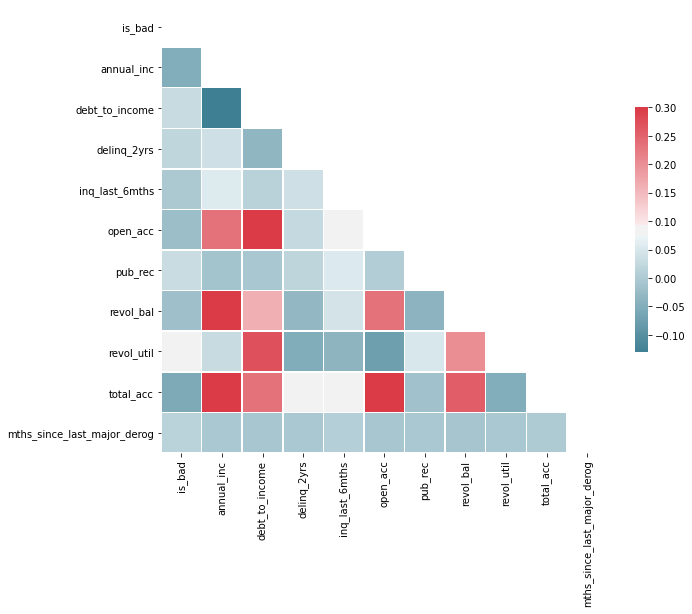

In [22]:
#heat map for correlation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask,
            vmax=.3,
            cmap=cmap,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5})

In [23]:
is_bad_data = data[data.is_bad == 1]
not_bad_data = data[data.is_bad == 0]

(array([965., 277.,  40.,   7.,   2.,   1.,   0.,   1.,   1.,   1.]),
 array([  4080.,  73672., 143264., 212856., 282448., 352040., 421632.,
        491224., 560816., 630408., 700000.]),
 <a list of 10 Patch objects>)

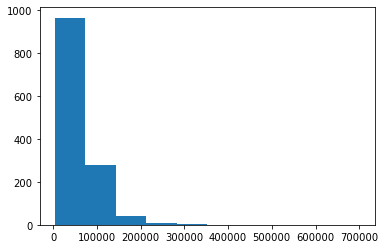

In [24]:
plt.hist(is_bad_data['annual_inc'],bins=10 ,stacked = True, rwidth = 1)

(array([7.008e+03, 1.473e+03, 1.510e+02, 4.700e+01, 1.300e+01, 4.000e+00,
        2.000e+00, 0.000e+00, 3.000e+00, 3.000e+00]),
 array([  2000.,  91800., 181600., 271400., 361200., 451000., 540800.,
        630600., 720400., 810200., 900000.]),
 <a list of 10 Patch objects>)

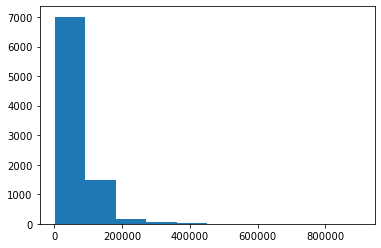

In [25]:
plt.hist(not_bad_data['annual_inc'], bins = 10, stacked = True, rwidth = 1)

In [26]:
is_bad_data.head()

,is_bad,home_ownership,annual_inc,verification_status,pymnt_plan,purpose_cat,zip_code,addr_state,debt_to_income,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mths_since_last_major_derog,policy_code
16,1,OWN,22000.0,VERIFIED - income source,n,other small business,324xx,FL,14.95,0.0,0.0,4.0,0.0,8511,78.8,9.0,m,3,PC2
20,1,MORTGAGE,72000.0,not verified,n,small business,741xx,OK,17.48,0.0,6.0,13.0,0.0,1249,6.1,23.0,f,3,PC3
51,1,MORTGAGE,120000.0,VERIFIED - income source,n,other,207xx,MD,21.16,4.0,1.0,25.0,0.0,43109,72.3,49.0,f,3,PC5
54,1,RENT,23040.0,VERIFIED - income source,n,credit card,951xx,CA,12.66,0.0,0.0,6.0,0.0,8282,62.3,11.0,f,2,PC3
55,1,RENT,15000.0,VERIFIED - income,n,other,774xx,TX,18.08,0.0,0.0,2.0,0.0,9279,36.5,3.0,f,1,PC4


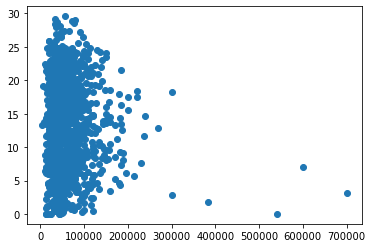

In [27]:
plt.scatter(x= is_bad_data['annual_inc'], y= is_bad_data['debt_to_income'])

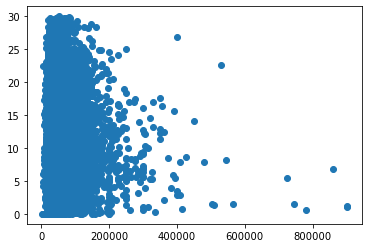

In [28]:
plt.scatter(x= not_bad_data['annual_inc'], y= not_bad_data['debt_to_income'])


(array([27., 22., 21., 40., 41., 36., 43., 39., 63., 65., 48., 44., 69.,
        67., 70., 60., 69., 53., 70., 59., 59., 54., 43., 50., 44., 19.,
         5.,  6.,  4.,  5.]),
 array([ 0.   ,  0.986,  1.972,  2.958,  3.944,  4.93 ,  5.916,  6.902,
         7.888,  8.874,  9.86 , 10.846, 11.832, 12.818, 13.804, 14.79 ,
        15.776, 16.762, 17.748, 18.734, 19.72 , 20.706, 21.692, 22.678,
        23.664, 24.65 , 25.636, 26.622, 27.608, 28.594, 29.58 ]),
 <a list of 30 Patch objects>)

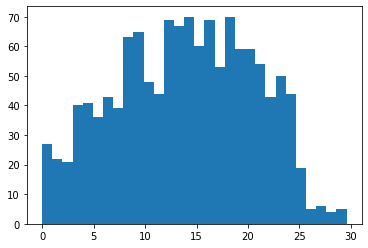

In [29]:
plt.hist(is_bad_data['debt_to_income'], bins = 30, stacked = True, rwidth = 1)

(array([223., 194., 221., 232., 296., 315., 309., 364., 392., 424., 415.,
        415., 436., 434., 424., 411., 413., 355., 391., 393., 336., 319.,
        304., 270., 221.,  49.,  59.,  30.,  31.,  29.]),
 array([ 0.        ,  0.99966667,  1.99933333,  2.999     ,  3.99866667,
         4.99833333,  5.998     ,  6.99766667,  7.99733333,  8.997     ,
         9.99666667, 10.99633333, 11.996     , 12.99566667, 13.99533333,
        14.995     , 15.99466667, 16.99433333, 17.994     , 18.99366667,
        19.99333333, 20.993     , 21.99266667, 22.99233333, 23.992     ,
        24.99166667, 25.99133333, 26.991     , 27.99066667, 28.99033333,
        29.99      ]),
 <a list of 30 Patch objects>)

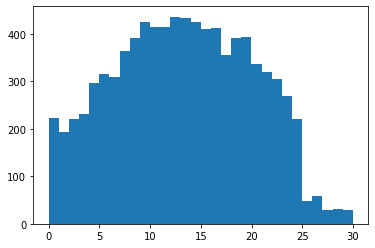

In [30]:
plt.hist(not_bad_data['debt_to_income'], bins = 30, stacked = True, rwidth = 1)

In [31]:
def plot_home_ownership_donut(input_df):
    home_ownership = pd.DataFrame(input_df.home_ownership.value_counts()).reset_index()
    home_ownership.rename(columns = {'index':'home_ownership', 'home_ownership':'counts'}, inplace = True)
    home_ownership = home_ownership[home_ownership.home_ownership != 'NONE']
    

    my_circle=plt.Circle( (0,0), 0.7, color='white')

    plt.pie(home_ownership['counts'],
            labels=home_ownership['home_ownership'], 
            colors=['red','green','blue','skyblue'])
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.show()


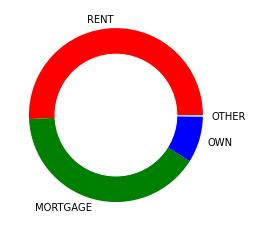

In [32]:
plot_home_ownership_donut(is_bad_data)

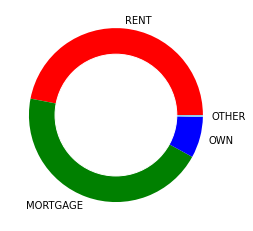

In [33]:
plot_home_ownership_donut(not_bad_data)

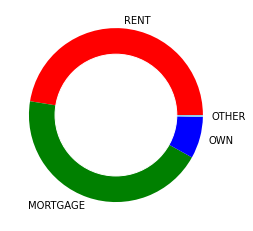

In [34]:
plot_home_ownership_donut(data)

In [35]:
data.head()

,is_bad,home_ownership,annual_inc,verification_status,pymnt_plan,purpose_cat,zip_code,addr_state,debt_to_income,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mths_since_last_major_derog,policy_code
0,0,MORTGAGE,50000.0,not verified,n,medical,766xx,TX,10.87,0.0,0.0,15.0,0.0,12087,12.1,44.0,f,1,PC4
1,0,RENT,39216.0,not verified,n,debt consolidation,660xx,KS,9.15,0.0,2.0,4.0,0.0,10114,64.0,5.0,f,2,PC1
2,0,RENT,65000.0,not verified,n,credit card,916xx,CA,11.24,0.0,0.0,4.0,0.0,81,0.6,8.0,f,3,PC4
3,0,MORTGAGE,57500.0,not verified,n,debt consolidation,124xx,NY,6.18,1.0,0.0,6.0,0.0,10030,37.1,23.0,f,2,PC2
4,0,MORTGAGE,50004.0,VERIFIED - income,n,debt consolidation,439xx,OH,19.03,0.0,4.0,8.0,0.0,10740,40.4,21.0,f,3,PC3


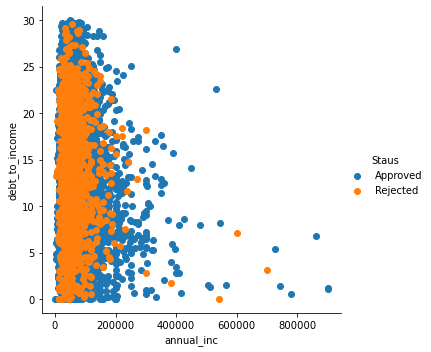

In [36]:
sns.FacetGrid(data, hue="is_bad",size=5) \
   .map(plt.scatter, "annual_inc", "debt_to_income") \
   .add_legend(title = 'Staus', labels = ['Approved','Rejected'])

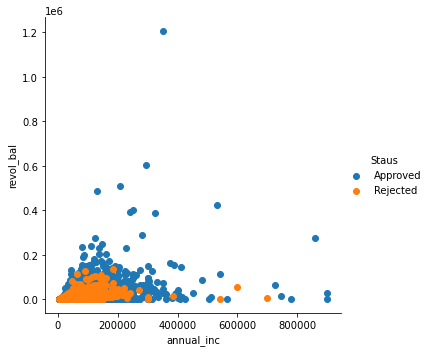

In [37]:
sns.FacetGrid(data, hue="is_bad",size=5) \
   .map(plt.scatter, "annual_inc", "revol_bal") \
   .add_legend(title = 'Staus', labels = ['Approved','Rejected'])

(array([865., 282.,  85.,  33.,  14.,   4.,   4.,   4.,   2.,   2.]),
 array([     0. ,  13645.6,  27291.2,  40936.8,  54582.4,  68228. ,
         81873.6,  95519.2, 109164.8, 122810.4, 136456. ]),
 <a list of 10 Patch objects>)

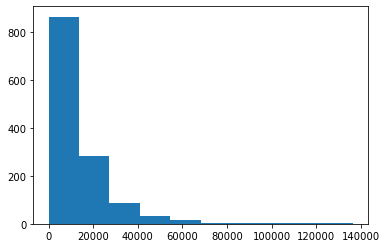

In [38]:
plt.hist(is_bad_data['revol_bal'],bins=10 ,stacked = True, rwidth = 1)

(array([8.648e+03, 4.500e+01, 4.000e+00, 4.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([      0. ,  120735.9,  241471.8,  362207.7,  482943.6,  603679.5,
         724415.4,  845151.3,  965887.2, 1086623.1, 1207359. ]),
 <a list of 10 Patch objects>)

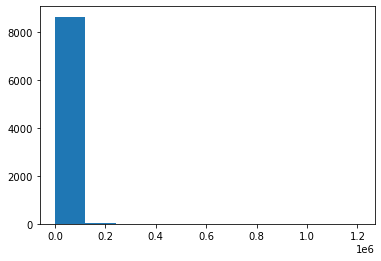

In [39]:
plt.hist(not_bad_data['revol_bal'],bins=10, stacked = True, rwidth = 1)

In [40]:
# def outlier_detection(data):
#     q1, q3= np.percentile(data,[25,75])
#     iqr = q3 - q1
#     lower_bound = q1 -(1.5 * iqr) 
#     upper_bound = q3 +(1.5 * iqr)
#     return lower_bound, upper_bound

In [41]:
# revol_bal_lower,revol_bal_upper = outlier_detection(not_bad_data['revol_bal'])

In [42]:
# revol_bal_upper

In [43]:
# not_bad_data.shape

In [44]:
# not_bad_data[not_bad_data['revol_bal'] <= revol_bal_upper].shape

In [45]:
# outlier_removed_revol_bal_not_bad_data = not_bad_data[not_bad_data['revol_bal'] <= revol_bal_upper]

In [46]:
# plt.hist(outlier_removed_revol_bal_not_bad_data['revol_bal'],bins=10, stacked = True, rwidth = 1)

In [47]:
# revol_bal_lower,revol_bal_upper = outlier_detection(is_bad_data['revol_bal'])
# outlier_removed_revol_bal_is_bad_data = is_bad_data[is_bad_data['revol_bal'] <= revol_bal_upper]

In [48]:
# outlier_removed_revol_bal_is_bad_data.shape

In [49]:
# plt.hist(outlier_removed_revol_bal_is_bad_data['revol_bal'],bins=10 ,stacked = True, rwidth = 1)

In [50]:
#top categories who get Loan 
pd.DataFrame(not_bad_data.groupby(by = ['purpose_cat'])['purpose_cat'].count()).rename(columns = {'purpose_cat':'count'}).reset_index().sort_values(by = 'count', ascending =  False).reset_index(drop= True)

,purpose_cat,count
0,debt consolidation,3932
1,credit card,1170
2,other,901
3,home improvement,714
4,major purchase,495
5,small business,345
6,car,320
7,wedding,236
8,medical,158
9,moving,144


In [51]:
print(not_bad_data.shape)
print(is_bad_data.shape)

(8705, 19)
(1295, 19)


In [52]:
#top categories who get rejected 
pd.DataFrame(is_bad_data.groupby(by = ['purpose_cat'])['purpose_cat'].count()).rename(columns = {'purpose_cat':'count'}).reset_index().sort_values(by = 'count', ascending =  False).reset_index(drop= True)

,purpose_cat,count
0,debt consolidation,522
1,other,125
2,small business,116
3,credit card,103
4,debt consolidation small business,102
5,home improvement,86
6,major purchase,51
7,car,29
8,medical,25
9,other small business,18


In [53]:
debt_consol_Accepted = not_bad_data[not_bad_data.purpose_cat == 'debt consolidation']

In [54]:
debt_consol_Rejected = is_bad_data[is_bad_data.purpose_cat == 'debt consolidation']

(array([2.971e+03, 8.390e+02, 7.900e+01, 2.900e+01, 8.000e+00, 3.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([  9000.,  82500., 156000., 229500., 303000., 376500., 450000.,
        523500., 597000., 670500., 744000.]),
 <a list of 10 Patch objects>)

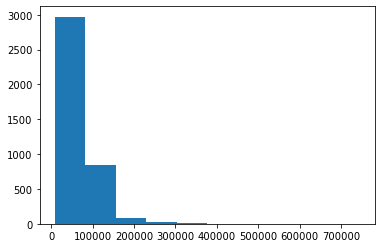

In [55]:
plt.hist(debt_consol_Accepted['annual_inc'],bins=10 ,stacked = True, rwidth = 1)

In [56]:
debt_consol_Accepted['annual_inc'].describe()

count      3932.000000
mean      67670.875028
std       43652.565482
min        9000.000000
25%       41475.000000
50%       59000.000000
75%       81000.000000
max      744000.000000
Name: annual_inc, dtype: float64

In [57]:
debt_consol_Rejected['annual_inc'].describe()

count       522.000000
mean      60403.314157
std       35549.580922
min        8000.000000
25%       36000.000000
50%       52200.000000
75%       75000.000000
max      300000.000000
Name: annual_inc, dtype: float64

(array([139., 222.,  98.,  33.,  16.,   9.,   3.,   0.,   1.,   1.]),
 array([  8000.,  37200.,  66400.,  95600., 124800., 154000., 183200.,
        212400., 241600., 270800., 300000.]),
 <a list of 10 Patch objects>)

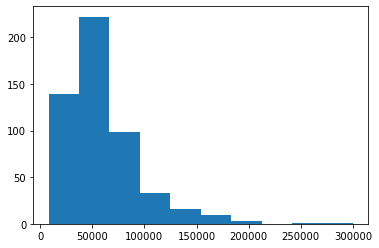

In [58]:
plt.hist(debt_consol_Rejected['annual_inc'],bins=10 ,stacked = True, rwidth = 1)

In [59]:
cat_cols

['verification_status',
 'addr_state',
 'purpose_cat',
 'pymnt_plan',
 'policy_code',
 'initial_list_status',
 'zip_code',
 'home_ownership']

In [60]:
num_cols

['is_bad',
 'annual_inc',
 'debt_to_income',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mths_since_last_major_derog']